# COURSE: Master calculus 1 using Python: derivatives and applications
## SECTION: Differentiation fundamentals
### LECTURE: CodeChallenge: Critical points in Python
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/pycalc1_x/?couponCode=202307

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# better image resolution
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Exercise 1: Critical points in numpy

In [ ]:
# x-axis grid
x = np.linspace(-1.5,1,10001)

# function
fx = x**2 + x**3

# empirical deritivate (difference)
df = np.diff(fx) / np.mean(np.diff(x))

# plot
_,axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(x,fx)
axs[0].set_ylim([-1,1])
axs[0].set_xlim(x[[0,-1]])
axs[0].set_title('The function')

axs[1].plot(x[:-1],df,label='Derivative')
axs[1].axhline(0,color='r',label='df=0')
axs[1].set_ylim([-1,2])
axs[1].set_xlim(x[[0,-1]])
axs[1].legend()
axs[1].set_title('Its derivative')

plt.tight_layout()
plt.show()

In [ ]:
# find df=0
exactZero = np.where( df==0 )[0]
print(f'Critical points at x={exactZero}')

In [ ]:
# setting up to find the minima
plt.plot(x[:-1],np.abs(df))
plt.ylim([-.1,1])
plt.show()

In [ ]:
# find minima
from scipy.signal import find_peaks

# find the minima
dfLocalMin = find_peaks(-np.abs(df))[0]

# print the results
for xx,yy in zip(x[dfLocalMin],fx[dfLocalMin]):
  print(f'Critical point/value: ({xx:.3f}, {yy:.3f})')

In [ ]:
# another plot
_,axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(x,fx,label='Function')
axs[0].plot(x[dfLocalMin],fx[dfLocalMin],'ro',label='Critical points')
axs[0].set_ylim([-1,1])
axs[0].set_xlim(x[[0,-1]])
axs[0].legend()
axs[0].set_title('The function')

axs[1].plot(x[:-1],df,label='Derivative')
axs[1].plot(x[dfLocalMin],df[dfLocalMin],'ro',label='Critical points')
axs[1].axhline(0,color='r')
axs[1].set_ylim([-1,2])
axs[1].set_xlim(x[[0,-1]])
axs[1].legend()
axs[1].set_title('Its derivative')

plt.tight_layout()
plt.show()

# Exercise 2: Critical points in sympy

In [2]:
x = sym.symbols('x')

# the function and its derivative
fx = x**2 + x**3
df = sym.diff(fx)
df

3*x**2 + 2*x

In [ ]:
# find and print the critical points
criticalPoints = sym.solve( sym.Eq(df,0) )

# print the results
for xx in criticalPoints:
  print(f'Critical point/value: ({xx}, {fx.subs(x,xx)})')

# Exercise 3: Critical points with discontinuity

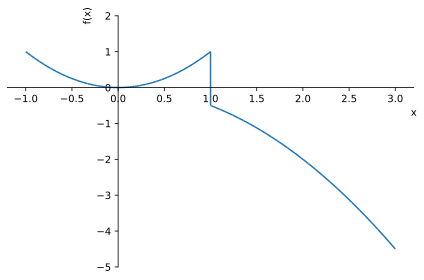

In [3]:
# list function pieces
piece1 =  x**2
piece2 = -x**2/2

# boundary
bound = 1

# put them together with conditions
fx = sym.Piecewise( 
      (piece1,x<bound),
      (piece2,x>=bound) )

sym.plot(fx,(x,-1,3),ylim=[-5,2]);

In [ ]:
# compute and plot derivative
dfx = sym.diff(fx)
sym.plot(dfx,(x,-1,3),ylim=[-5,5]);

In [ ]:
# find and print the critival points
criticalPoints = sym.solve( sym.Eq(dfx,0) )

criticalPoints

In [ ]:
# find the limit at the breakpoints
limL = sym.limit(fx,x,bound,'-')
limR = sym.limit(fx,x,bound,'+')

if limL!=limR:
  criticalPoints.append( 1 )

print(f'Critical points: {criticalPoints}')